In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [7,7]}, font_scale=1.2)

- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy


In [66]:
dataset = pd.read_csv('train.csv')
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [67]:
dataset.shape

(10886, 12)

In [68]:
dataset['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

# Data Analysis & Visualization
**Questions**
1. Make Profit feature
    - Each registerd USER rent bike for 5 USD/hour.
    - Each casual USER rents bike for 20 USD/hour.
    - Taxes 14%.
    - Maintenance 1500/year.
2. Distribution rental_bikes_count & profit.
3. Profit for each day per week.
4. Which season has more registration.
5. Which weather condition has more registration.
6. Correlation between profit & bikes_count with all features 
7. Register or Casual is more
8. Rental during holidays and workdays

In [69]:
# make profit feature
def calculate_profit(x):
  casual_customer = x['casual']
  register_customer = x['registered']
  registered_price = 5
  casual_price = 20
  taxes = 0.14
  maintenance_per_hour = 1500 / (365*24)
  profit_cash = casual_customer * casual_price + register_customer * registered_price
  profit_with_taxes = profit_cash - (profit_cash * taxes)
  total_profit = profit_with_taxes - maintenance_per_hour
  return total_profit

dataset['profit'] = dataset[['casual','registered']].apply(calculate_profit, axis=1)

In [70]:
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,107.328767
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,275.028767
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,201.928767
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,94.428767
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4.128767


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


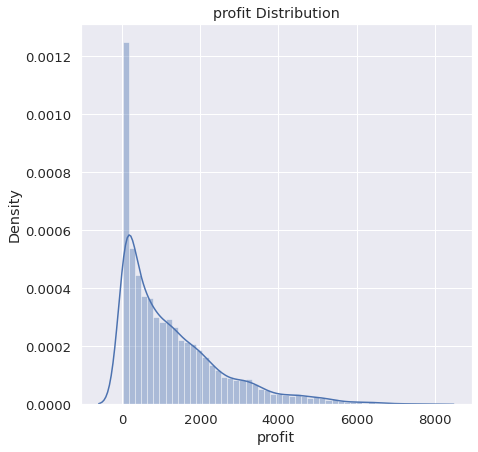

In [71]:
# Distribution rental_bikes_count & profit.
#sns.distplot(dataset['count'])
sns.distplot(dataset['profit'])
plt.title('profit Distribution')
plt.show()

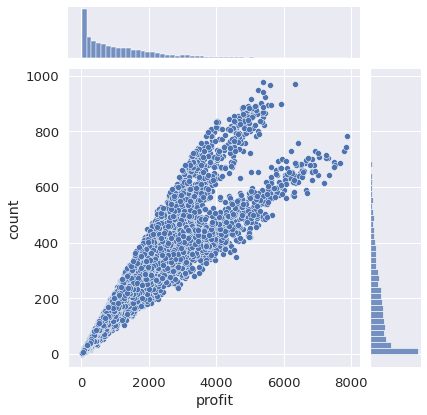

In [72]:
sns.jointplot(x='profit', y='count', data = dataset)

In [73]:
dataset['profit'].describe()

count    10886.000000
mean      1288.280751
std       1309.683400
min          4.128767
25%        253.528767
50%        889.928767
75%       1891.828767
max       7881.728767
Name: profit, dtype: float64

In [74]:
dataset[dataset['profit'] == dataset['profit'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit
9415,2012-09-15 16:00:00,3,0,0,2,27.06,31.06,36,15.0013,350,433,783,7881.728767


In [75]:
dataset[dataset['count'] == dataset['count'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977,5374.828767


In [76]:
# profit for ecah day per week
dataset['datetime'] = pd.to_datetime(dataset['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce') # coerce returns a NAT

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  profit      10886 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 1.1 MB


- Day of week: 1-6
- Day of month: 1-30
- Day of year: 1-365

In [78]:
dataset['year'] = dataset['datetime'].dt.year
dataset['month'] = dataset['datetime'].dt.month_name()
dataset['day_of_week'] = dataset['datetime'].dt.day_name()
dataset['hour'] = dataset['datetime'].dt.hour

In [79]:
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,month,day_of_week,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,107.328767,2011,January,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,275.028767,2011,January,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,201.928767,2011,January,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,94.428767,2011,January,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4.128767,2011,January,Saturday,4


In [80]:
dataset.groupby('day_of_week').mean()[['count','profit']]

,count,profit
day_of_week,,
Friday,197.844343,1250.484751
Monday,190.390716,1203.496079
Saturday,196.665404,1666.252504
Sunday,180.839772,1513.401535
Thursday,197.296201,1157.893803
Tuesday,189.723847,1112.073082
Wednesday,188.411348,1100.526188


In [81]:
dataset.groupby('day_of_week').describe()[['profit']].transpose()

day_of_week        Friday       Monday  ...      Tuesday    Wednesday
profit count  1529.000000  1551.000000  ...  1539.000000  1551.000000
       mean   1250.484751  1203.496079  ...  1112.073082  1100.526188
       std    1110.019552  1129.727600  ...  1065.481400  1111.243780
       min       4.128767     4.128767  ...     4.128767     4.128767
       25%     300.828767   249.228767  ...   210.528767   210.528767
       50%    1036.128767   954.428767  ...   834.028767   791.028767
       75%    1891.828767  1827.328767  ...  1704.778767  1657.478767
       max    5908.028767  5594.128767  ...  6338.028767  5447.928767

[8 rows x 7 columns]

In [82]:
# which season that has more registration and profit
dataset.groupby('season').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,699.920316,853.820568,4.128767,128.828767,438.428767,920.028767,7679.628767
2,2733.0,1537.472894,1453.088262,4.128767,322.328767,1216.728767,2244.428767,7795.728767
3,2733.0,1681.463893,1427.630038,4.128767,442.728767,1414.528767,2463.728767,7881.728767
4,2734.0,1224.171196,1185.870080,4.128767,292.228767,937.228767,1754.228767,7864.528767


In [83]:
dataset.groupby('season').describe()['count']

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [84]:
# Which weather condition has more registration & profit
dataset.groupby('weather').describe()['count']

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [85]:
dataset.groupby('season').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,699.920316,853.820568,4.128767,128.828767,438.428767,920.028767,7679.628767
2,2733.0,1537.472894,1453.088262,4.128767,322.328767,1216.728767,2244.428767,7795.728767
3,2733.0,1681.463893,1427.630038,4.128767,442.728767,1414.528767,2463.728767,7881.728767
4,2734.0,1224.171196,1185.870080,4.128767,292.228767,937.228767,1754.228767,7864.528767


In [86]:
# Correlation between profit & bikes_count with all features
correlation = dataset.corr()[['count','profit']]

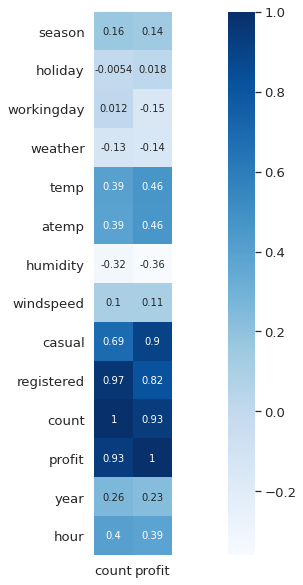

In [87]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation, cbar= True, square=True, annot=True, annot_kws={'size':10}, cmap='Blues')

In [88]:
# rental & profit during rush hours ( 7-9 am  &  3-5(15-17) pm )
def is_rush_hour(hour):
  return 1 if(hour in [7,8,9,15,16,17]) else 0

dataset['is_rush_hour'] = dataset['hour'].apply(is_rush_hour)
# or 
#dataset['is_rush_hour'] = dataset['hour'].apply(lambda hour: 1 if(hour in range(7,9),range(15,17)) else 0)

In [89]:
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,month,day_of_week,hour,is_rush_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,107.328767,2011,January,Saturday,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,275.028767,2011,January,Saturday,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,201.928767,2011,January,Saturday,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,94.428767,2011,January,Saturday,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4.128767,2011,January,Saturday,4,0


In [90]:
dataset.groupby('is_rush_hour').describe()['profit'].transpose()

is_rush_hour,0,1
count,8153.000000,2733.000000
mean,1069.674358,1940.420498
std,1217.987206,1356.260623
min,4.128767,4.128767
25%,158.928767,937.228767
50%,644.828767,1689.728767
75%,1547.828767,2622.828767
max,7864.528767,7881.728767


In [91]:
dataset.groupby('is_rush_hour').describe()['count'].transpose()

is_rush_hour,0,1
count,8153.000000,2733.000000
mean,153.140562,306.227955
std,158.808647,194.740685
min,1.000000,1.000000
25%,26.000000,157.000000
50%,108.000000,276.000000
75%,225.000000,420.000000
max,977.000000,970.000000


In [92]:
# rantal & profit during workingday & holiday
dataset.groupby('holiday').describe()['profit'].transpose()
dataset.groupby('workingday').describe()['profit'].transpose()

workingday,0,1
count,3474.000000,7412.000000
mean,1575.484179,1153.668675
std,1657.985547,1083.659550
min,4.128767,4.128767
25%,283.628767,236.328767
50%,887.778767,889.928767
75%,2493.828767,1758.528767
max,7881.728767,6338.028767


In [93]:
dataset.groupby('holiday').describe()['profit'].transpose()

holiday,0,1
count,10575.000000,311.000000
mean,1284.160493,1428.382786
std,1305.224861,1448.518613
min,4.128767,4.128767
25%,253.528767,251.378767
50%,889.928767,877.028767
75%,1883.228767,2371.278767
max,7881.728767,5426.428767


In [94]:
# registered or casual is more
correlation.loc[['casual','registered']]

,count,profit
casual,0.690414,0.902713
registered,0.970948,0.822156


In [95]:
# what is the average of bikes would be rented during the week
dataset.groupby('day_of_week').mean()['count']

day_of_week
Friday       197.844343
Monday       190.390716
Saturday     196.665404
Sunday       180.839772
Thursday     197.296201
Tuesday      189.723847
Wednesday    188.411348
Name: count, dtype: float64

In [96]:
dataset['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [97]:
# schools (9-12) & (2-9) profit
def check(x):
  return 1 if(x in ['September','October','November','December','February','March','April','May','June']) else 0

dataset['school_time'] = dataset['month'].apply(check)

In [98]:
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,month,day_of_week,hour,is_rush_hour,school_time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,107.328767,2011,January,Saturday,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,275.028767,2011,January,Saturday,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,201.928767,2011,January,Saturday,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,94.428767,2011,January,Saturday,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4.128767,2011,January,Saturday,4,0,0


In [99]:
dataset.groupby('school_time').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
school_time,,,,,,,,
0,2708.0,1302.252401,1290.751798,4.128767,240.628767,881.328767,2038.028767,6497.128767
1,8178.0,1283.654287,1315.937715,4.128767,257.828767,894.228767,1848.828767,7881.728767


In [100]:
dataset.groupby('school_time').describe()['count']

,count,mean,std,min,25%,50%,75%,max
school_time,,,,,,,,
0,2708.0,187.598597,179.258377,1.0,40.0,139.0,282.0,897.0
1,8178.0,192.890560,181.756401,1.0,44.0,147.0,284.0,977.0


In [101]:
# profit in 2011 & Saturdays & season fall
dataset[ (dataset['year'] == 2011) & (dataset['day_of_week'] == 'Saturday') & (dataset['season'] == 3)][['profit','count']].sum()

profit    358690.323288
count      39162.000000
dtype: float64

# Data Visualization
- **Numerical Features (Univariate - Bivariate)**
- **Categorical Features (Univariate - Bivariate)**
- Matrix plot

**Numerical Univarite**

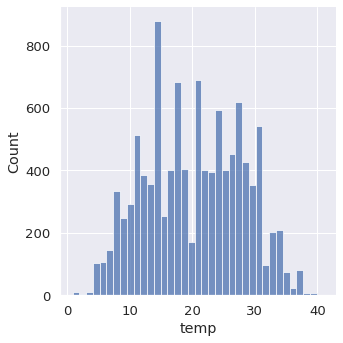

In [102]:
 # Univarite
sns.displot(dataset['temp'], kde=False)
# sns.distplot(dataset['humidity'], kde=False)
# sns.distplot(dataset['windspeed'], kde=False)
# sns.distplot(dataset['casual'], kde=False) 
# sns.distplot(dataset['registered'], kde=False)


**Numerical Bivariate**:
- x = temp or humidity or windspeed or casual or registered...
- y = count or profit

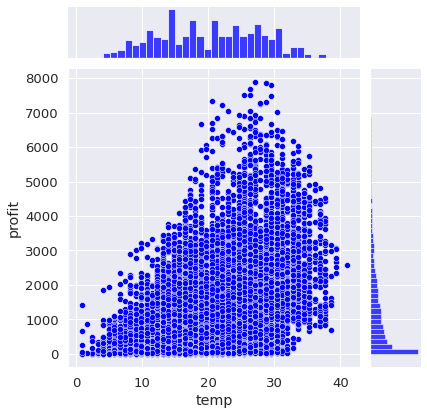

In [103]:
sns.jointplot(x='temp', y='profit', data=dataset, color='blue')

**Categorical Univariate**

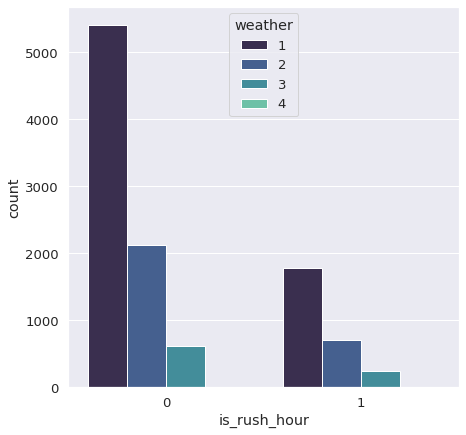

In [104]:
#sns.countplot(x='season', data=dataset, palette='flare')
sns.countplot(x='is_rush_hour', hue='weather', data=dataset, palette='mako')

**Categorical Bivariate**

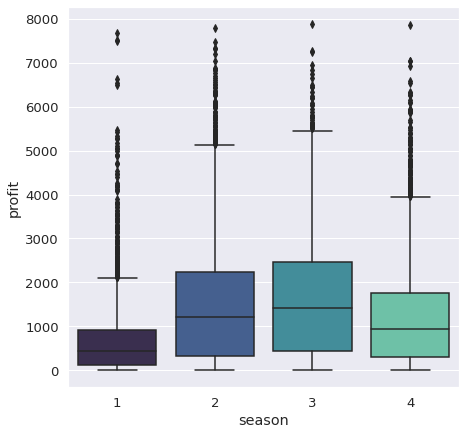

In [105]:
sns.boxplot(x='season', y='profit', data=dataset, palette='mako')

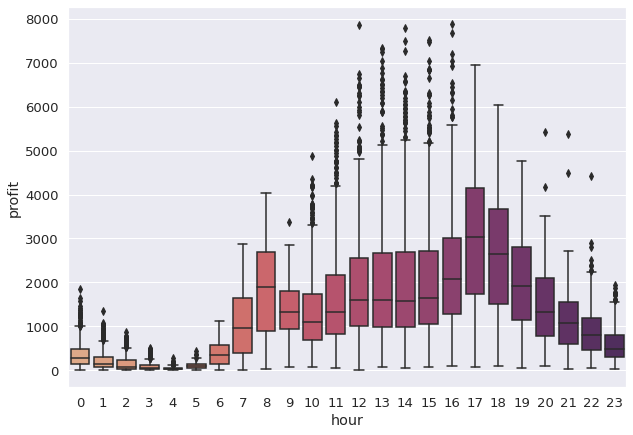

In [106]:
plt.figure(figsize=(10,7))
sns.boxplot(x='hour', y='profit', data=dataset, palette='flare')

**Matrix Plot**

In [107]:
new_dataset = pd.pivot_table(data=dataset, values='profit', columns='day_of_week', index='month')
new_dataset

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,1154.450434,1347.061161,1564.097100,1901.682934,1298.500434,1145.928073,1017.447255
August,1620.510712,1476.018767,2177.205434,1696.931267,1571.299600,1531.130434,1557.712795
December,939.056267,946.694739,1147.241962,884.553767,913.542934,1018.283767,872.943767
February,720.246498,575.349820,663.462100,565.585910,561.281584,537.583852,589.928063
January,562.122384,391.098271,583.123767,507.168627,565.983389,471.271287,422.948767
July,1685.607934,1704.002378,2129.260434,1874.837795,1607.132934,1472.459323,1682.382934
June,1575.002378,1474.728767,2399.467656,2142.542656,1422.161267,1441.439600,1451.257934
March,819.221021,968.421987,1401.718350,1258.993724,873.243556,759.302717,865.646414
May,1654.002934,1172.976267,2287.966267,1791.423767,1477.266962,1251.994739,1189.405850


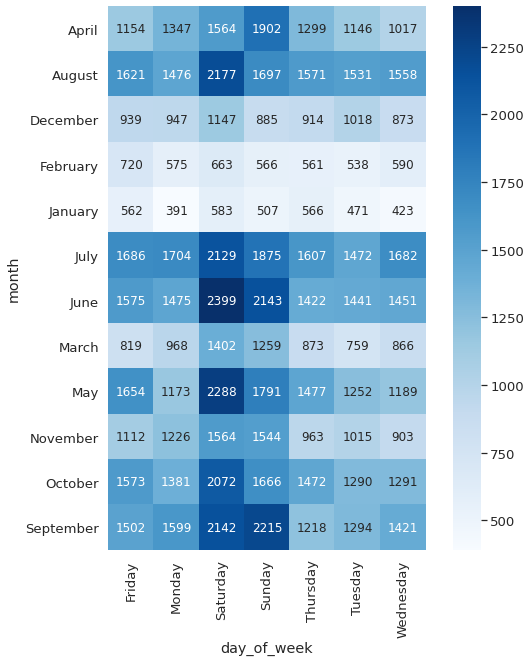

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(new_dataset, cbar= True, square=True, fmt='.0f', annot=True, annot_kws={'size':12}, cmap='Blues')

# Data Preprocessing
 - Data Cleaning
 - Work with missing data
 - Work with categorical data
 - Detect and handle outliers
 - Split data to train and test
 - Feature scaling

**Data Cleaning As Numerical**
- Change numeric columns to numeric (by using to_numeric)
- Use describe to make sure values is true

In [109]:
# data cleaning
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,hour,is_rush_hour,school_time
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,1288.280751,2011.501929,11.541613,0.251056,0.751240
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,1309.683400,0.500019,6.915838,0.433641,0.432314
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,4.128767,2011.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,253.528767,2011.000000,6.000000,0.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,889.928767,2012.000000,12.000000,0.000000,1.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,1891.828767,2012.000000,18.000000,1.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,7881.728767,2012.000000,23.000000,1.000000,1.000000


In [110]:
dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'profit', 'year', 'month', 'day_of_week', 'hour', 'is_rush_hour',
       'school_time'],
      dtype='object')

In [111]:
for col in ['temp','humidity', 'windspeed', 'casual', 'registered', 'count','profit']:
  dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  int64         
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  int64         
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  count         10886 non-null  int64         
 12  profit        10886 non-null  float64       
 13  year          10886 non-null  int64         
 14  month         10886 non-null  object        
 15  day_of_week   10886 non-null  object

**Data Cleaning As Categorical**
- Use unique to check categorcal feature values 

In [113]:
dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'profit', 'year', 'month', 'day_of_week', 'hour', 'is_rush_hour',
       'school_time'],
      dtype='object')

In [114]:
for col in ['season', 'holiday', 'workingday','year', 'month', 'day_of_week', 'hour', 'is_rush_hour','school_time']:
  print(f'-----{col}-----')
  print(f'-----{dataset[col].unique()}-----')
  print('======================')

-----season-----
-----[1 2 3 4]-----
-----holiday-----
-----[0 1]-----
-----workingday-----
-----[0 1]-----
-----year-----
-----[2011 2012]-----
-----month-----
-----['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']-----
-----day_of_week-----
-----['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']-----
-----hour-----
-----[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]-----
-----is_rush_hour-----
-----[0 1]-----
-----school_time-----
-----[0 1]-----


In [115]:
# work with missing values
dataset.isnull().sum()

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
profit          0
year            0
month           0
day_of_week     0
hour            0
is_rush_hour    0
school_time     0
dtype: int64

In [116]:
dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'profit', 'year', 'month', 'day_of_week', 'hour', 'is_rush_hour',
       'school_time'],
      dtype='object')

In [117]:
dataset['monthh'] = dataset['datetime'].dt.month

In [118]:
dataset = dataset[['season', 'holiday', 'workingday', 'weather', 'temp','humidity', 'count','profit', 'monthh', 'day_of_week', 'hour']]
dataset

,season,holiday,workingday,weather,temp,humidity,count,profit,monthh,day_of_week,hour
0,1,0,0,1,9.84,81,16,107.328767,1,Saturday,0
1,1,0,0,1,9.02,80,40,275.028767,1,Saturday,1
2,1,0,0,1,9.02,80,32,201.928767,1,Saturday,2
3,1,0,0,1,9.84,75,13,94.428767,1,Saturday,3
4,1,0,0,1,9.84,75,1,4.128767,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,336,1534.928767,12,Wednesday,19
10882,4,0,1,1,14.76,57,241,1165.128767,12,Wednesday,20
10883,4,0,1,1,13.94,61,168,773.828767,12,Wednesday,21
10884,4,0,1,1,13.94,61,129,709.328767,12,Wednesday,22


In [119]:
# work with categorical values
dataset = pd.get_dummies(dataset, columns=['season', 'weather', 'day_of_week'], drop_first=True)

In [120]:
# detect and handle outliers
dataset.describe()[['temp', 'humidity','count', 'profit']]

,temp,humidity,count,profit
count,10886.00000,10886.000000,10886.000000,10886.000000
mean,20.23086,61.886460,191.574132,1288.280751
std,7.79159,19.245033,181.144454,1309.683400
min,0.82000,0.000000,1.000000,4.128767
25%,13.94000,47.000000,42.000000,253.528767
50%,20.50000,62.000000,145.000000,889.928767
75%,26.24000,77.000000,284.000000,1891.828767
max,41.00000,100.000000,977.000000,7881.728767


In [121]:
# split data
x = dataset.drop('profit',axis=1)
y = dataset['profit']

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [124]:
print(x_train.shape, y_train.shape, x_test.shape)

(8708, 19) (8708,) (2178, 19)


In [125]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [126]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [127]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Machine Learning

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [139]:
model = {
    "LR": LinearRegression(),
    "KNNR": KNeighborsRegressor(),
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
}

In [140]:
for name, model in model.items():
  print(f'Using model: {name}')
  model.fit(x_train,y_train)
  print(f'Training Score: {model.score(x_train,y_train)}')
  print(f'Testing Score: {model.score(x_test,y_test)}')
  y_pred = model.predict(x_test)
  print(f'RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}')
  print('=============================================')


Using model: LR
Training Score: 0.9195796504353109
Testing Score: 0.9151110643333592
RMSE : 386.24033970728976
Using model: KNNR
Training Score: 0.9656753595011831
Testing Score: 0.9430205274904032
RMSE : 316.4399435539078
Using model: SVR
Training Score: 0.1738182652343164
Testing Score: 0.1594807888384353
RMSE : 1215.3627133143973
Using model: DT
Training Score: 0.9999999943942587
Testing Score: 0.9704136791607669
RMSE : 228.02242886837683
Using model: RF
Training Score: 0.9977149219533368
Testing Score: 0.9829153138229777
RMSE : 173.2748729414094
Using model: XGBR
[06:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score: 0.9845205762108655
Testing Score: 0.9805133991143755
RMSE : 185.0547049225945


# Testing & Deployment

In [141]:
x.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'count', 'monthh', 'hour',
       'season_2', 'season_3', 'season_4', 'weather_2', 'weather_3',
       'weather_4', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object')

In [143]:
len(x.columns)

19

In [144]:
test_data = [1,0,24,60,126,5,5,8,1,0,0,0,1,0,0,0,0,0,1]

In [145]:
len(test_data)

19

In [146]:
test_data = scaler.transform([test_data])

In [147]:
model.predict(test_data)

array([876.153], dtype=float32)